Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING THE DATASET

In [2]:
file_path = 'student_admission_record_dirty.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [3]:
# 1. Check for Missing Values
for col in dataset.columns:
    print(f"Missing values in '{col}' is:", dataset[col].isnull().sum())

Missing values in 'Name' is: 10
Missing values in 'Age' is: 10
Missing values in 'Gender' is: 10
Missing values in 'Admission Test Score' is: 11
Missing values in 'High School Percentage' is: 11
Missing values in 'City' is: 10
Missing values in 'Admission Status' is: 10


In [4]:
# 2. Check for duplicates
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 6


Splitting dataset to Numerical & Categorical

In [5]:
numerical_columns = ['Age', 'Admission Test Score', 'High School Percentage']
categorical_columns = ['Name', 'Gender', 'City', 'Admission Status']

In [6]:
# 3. Check for Outliers
for col in numerical_columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((dataset[col] < lower_bound) | (dataset[col] > upper_bound)).sum()
    print(f"Outliers in '{col}': {outliers}")

Outliers in 'Age': 5
Outliers in 'Admission Test Score': 2
Outliers in 'High School Percentage': 2


Text(0, 0.5, 'Frequency')

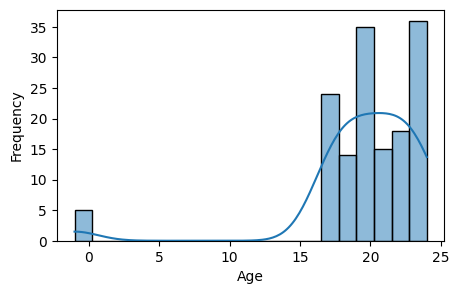

In [7]:
plt.figure(figsize=(5, 3))
sns.histplot(dataset['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

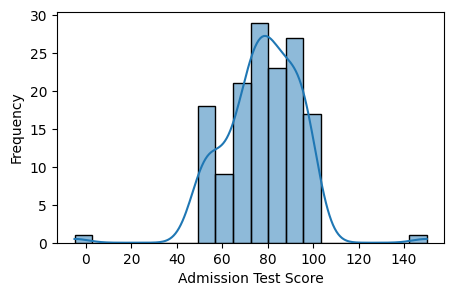

In [8]:
plt.figure(figsize=(5, 3))
sns.histplot(dataset['Admission Test Score'], bins=20, kde=True)
plt.xlabel('Admission Test Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

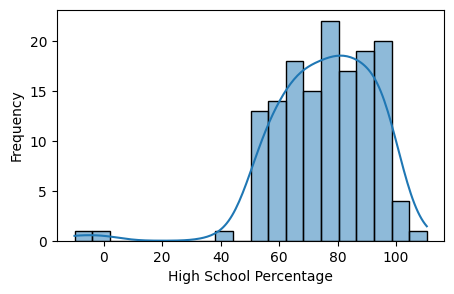

In [9]:
plt.figure(figsize=(5, 3))
sns.histplot(dataset['High School Percentage'], bins=20, kde=True)
plt.xlabel('High School Percentage')
plt.ylabel('Frequency')

In [10]:
dataset = dataset.drop_duplicates()

In [11]:
dataset.drop(dataset[(dataset['Admission Test Score'] > 100) | (dataset['Admission Test Score'] < 0)].index, inplace=True)

In [12]:
dataset.drop(dataset[(dataset['High School Percentage'] > 100) | (dataset['High School Percentage'] < 0)].index, inplace=True)

HANDLING MISSING DATA

In [13]:
# Handling numerical with mean
for col in numerical_columns:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

C:\Users\rhmar\AppData\Local\Temp\ipykernel_15580\3045520236.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


In [14]:
# Fill categorical columns with mode
for col in categorical_columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

C:\Users\rhmar\AppData\Local\Temp\ipykernel_15580\3930099264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [15]:
dataset.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.900000,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.730000,Karachi,Rejected
2,Bushra,17.0,Male,89.0,75.766963,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.290000,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.130000,Lahore,Rejected


In [16]:
# Handling outliers using IQR method
def handle_outliers(column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset[column] = dataset[column].clip(lower=lower_bound, upper=upper_bound)

In [17]:
for col in numerical_columns:
    handle_outliers(col)

In [18]:
dataset['Age'] = dataset['Age'].astype(int).clip(lower=17)

dataset['High School Percentage'] = dataset['High School Percentage'].round(2)

In [19]:
gender_encoder = LabelEncoder()
dataset['Gender']= gender_encoder.fit_transform(dataset['Gender'])

In [20]:
dataset.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24,0,50.0,68.90,Quetta,Rejected
1,Waqar,21,0,99.0,60.73,Karachi,Rejected
2,Bushra,17,1,89.0,75.77,Islamabad,Accepted
3,Aliya,17,1,55.0,85.29,Karachi,Rejected
4,Bilal,20,1,65.0,61.13,Lahore,Rejected


Douplecheck of dataset

In [21]:
for col in dataset.columns:
    print(f"Missing values in '{col}':", dataset[col].isnull().sum())

duplicates_count = dataset.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}\n")

for col in numerical_columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((dataset[col] < lower_bound) | (dataset[col] > upper_bound)).sum()
    print(f"Outliers in '{col}': {outliers}")

Missing values in 'Name': 0
Missing values in 'Age': 0
Missing values in 'Gender': 0
Missing values in 'Admission Test Score': 0
Missing values in 'High School Percentage': 0
Missing values in 'City': 0
Missing values in 'Admission Status': 0

Number of duplicate rows: 1

Outliers in 'Age': 0
Outliers in 'Admission Test Score': 0
Outliers in 'High School Percentage': 0


In [22]:
dataset = dataset.drop_duplicates()

In [23]:
import random
import pandas as pd

def generate_data(dataset, num_rows=2000):
    generated_data = []

    for _ in range(num_rows):
        generate_row = {
            "Name": f"Student_{random.randint(1, 10000)}",
            # For Age
            "Age": random.randint(
                max(10, int(dataset["Age"].min() - 10)),
                int(dataset["Age"].max() + 10)
            ),

            # For Gender
            "Gender": random.choice(list(dataset["Gender"].unique())),  
            # Admission Test Score range
            "Admission Test Score": int(random.uniform(
                dataset["Admission Test Score"].min() * 0.8,
                dataset["Admission Test Score"].max() * 1.2
            )),

            # High School Percentage
            "High School Percentage": round(random.uniform(
                max(40, dataset["High School Percentage"].min() - 10),
                min(100, dataset["High School Percentage"].max() + 10)
            ), 2),

            # City 
            "City": random.choice(list(dataset["City"].unique()) + ["Unknown"]),

            # Admission Status
            "Admission Status": random.choice(dataset["Admission Status"].unique())
        }
        generated_data.append(generate_row)

    generate_df = pd.DataFrame(generated_data)
    return generate_df


In [24]:
rows = generate_data(dataset, num_rows=2000)

# Combine original and generated datasets
full_dataset = pd.concat([dataset, rows], ignore_index=True)

In [25]:
output_file = "student_record.csv"
full_dataset.to_csv(output_file, index=False)

In [26]:
df = pd.read_csv(output_file)

df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24,0,50.0,68.90,Quetta,Rejected
1,Waqar,21,0,99.0,60.73,Karachi,Rejected
2,Bushra,17,1,89.0,75.77,Islamabad,Accepted
3,Aliya,17,1,55.0,85.29,Karachi,Rejected
4,Bilal,20,1,65.0,61.13,Lahore,Rejected
